In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from intro_Data import *

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
data = [[5, 2, 8, 8, 1], [4, 1, 7, 9, 2], [5, 3, 2, 10, 3]]
pdf = pd.DataFrame(data = data, index = ['point A', 'point B', 'point C'], columns = ['c1' ,'c2', 'c3', 'c4', 'y'])
pdf

,c1,c2,c3,c4,y
point A,5,2,8,8,1
point B,4,1,7,9,2
point C,5,3,2,10,3


In [16]:
y = np.array(pdf['y'].values)
x = np.array(pdf.drop(columns = 'y'))

In [17]:
knn = KNN(n_neighbors = 2, weights = 'distance')
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [18]:
x

array([[ 5,  2,  8,  8],
       [ 4,  1,  7,  9],
       [ 5,  3,  2, 10]], dtype=int64)

In [19]:
#Finding the closest neighbor to point a
knn.predict(x[0].reshape(1,-1))

array([1], dtype=int64)

In [20]:
#Finding the distance from a to the nearest neighbor
neighbors = knn.kneighbors(x[0].reshape(1,-1), return_distance = True)
neighbors

(array([[0., 2.]]), array([[0, 1]], dtype=int64))

In [21]:
distances = np.sum((x[0] - x)**2,axis=1)**0.5

In [22]:
df = pd.DataFrame(distances)
df

,0
0,0.000000
1,2.000000
2,6.403124


In [23]:
wine_data = pd.read_csv('./Data/winequality-white.csv', ';')

In [24]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
y_wine = np.array(wine_data['quality'].values)
x_wine = np.array(wine_data.drop(columns = 'quality'))

In [33]:
#Finding the optimal number of neighbors for our knn classifier
neighbor_range = np.array(range(2,41))

train=[]
test=[]

k = 10

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors = n_neighbors)
    tr,te = do_Kfold(knn, x_wine, y_wine, k, SS(), random_state=146)
    train.append(np.mean(tr))
    test.append(np.mean(te))

In [34]:
idx = test == np.max(test)
neighbor_range[idx]

array([2])

In [38]:
np.max(test)

0.5837031008722506

In [112]:
test

[0.6496556904970576,
 0.6600659404866241,
 0.6653720629356037,
 0.6663928884437211,
 0.6710888527190019,
 0.6686398731271649,
 0.6739480823004049,
 0.6788485455531907,
 0.6774224781937315,
 0.6810955302366346,
 0.6806890363507366,
 0.6808901965694253,
 0.6810942782020784,
 0.6806836108676599,
 0.6819076833187262,
 0.6823170986185885,
 0.6843595843245274,
 0.6837448353574559,
 0.6886444639205376,
 0.6847648261758692,
 0.6851742414757314,
 0.6861925629147364,
 0.6866057343182671,
 0.6880343057468385,
 0.6872163098368181,
 0.6880322190225783,
 0.6870122282041652,
 0.6872158924919661,
 0.6863987312716497,
 0.6878281373899253,
 0.6892571261633489,
 0.6884416343224407,
 0.6880318016777263,
 0.6896673761529152,
 0.6910963649263386,
 0.691506197571053,
 0.6935457618630274,
 0.6945661700262927,
 0.6927260965735988]

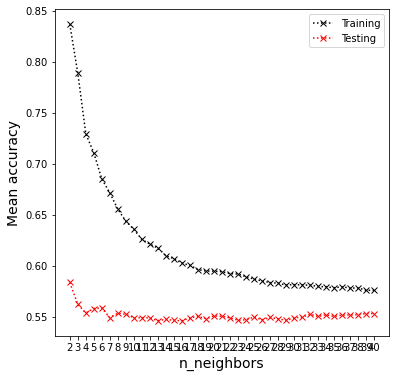

In [35]:
#Graphing how well each number of neighbors perform
plt.figure(figsize=(6,6))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('n_neighbors',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

In [39]:
#Finding the optimal number of neighbors for our knn classifier with distance as a parameter
neighbor_range = np.array(range(2,41))

train=[]
test=[]

k = 10

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors = n_neighbors, weights = 'distance')
    tr,te = do_Kfold(knn, x_wine, y_wine, k, SS(), random_state=146)
    train.append(np.mean(tr))
    test.append(np.mean(te))

In [40]:
idx = test == np.max(test)
neighbor_range[idx]

array([39])

In [41]:
np.max(test)

0.6945661700262927

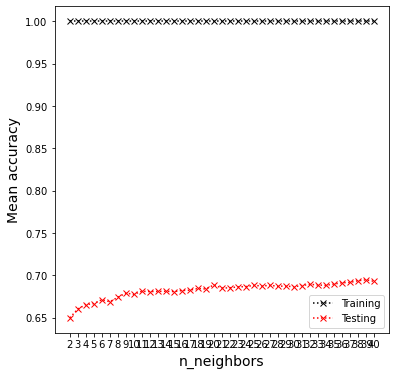

In [42]:
plt.figure(figsize=(6,6))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('n_neighbors',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

In [60]:
Xtrain, Xtest ,ytrain , ytest = tts(x_wine, y_wine , test_size = 0.25, random_state = 99, shuffle = True)

In [61]:
ss = SS()
Xtrain_s = ss.fit_transform(Xtrain)
Xtest_s = ss.transform(Xtest)

In [62]:
#Making a confusion matrix with the optimal number of neighbors and the wine data
n_neighbors = 39
knn = KNN(n_neighbors = n_neighbors, weights = 'distance')
knn.fit(Xtrain_s,ytrain)
y_pred = knn.predict(Xtest_s)

In [63]:
cm,acc = compare_classes(ytest, y_pred)
cm

Accuracy = 0.66


Predicted,4,5,6,7,8
Actual,,,,,
3,0,3,3,0,0
4,4,26,12,1,0
5,0,239,127,8,0
6,0,71,436,40,0
7,0,2,93,117,0
8,0,0,14,11,18


In [72]:
knn.score(Xtrain_s,ytrain)

1.0

In [64]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [65]:
wine_data['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [70]:
#logistic regression
log_reg = LR(max_iter=10000)
log_reg.fit(Xtrain_s, ytrain)

y_pred = log_reg.predict(Xtest_s)

cm, acc = compare_classes(ytest, y_pred)
cm

Accuracy = 0.53


Predicted,4,5,6,7,8,9
Actual,,,,,,
3,0,4,1,0,1,0
4,3,24,16,0,0,0
5,0,193,178,3,0,0
6,0,104,412,30,0,1
7,0,8,164,40,0,0
8,0,3,27,13,0,0


In [71]:
log_reg.score(Xtrain_s, ytrain)

0.5450585352572829

In [102]:
log_reg.predict_proba(np.array(Xtest_s))[19]

array([1.95345224e-03, 7.02947026e-02, 2.90810513e-01, 4.78797824e-01,
       1.45646584e-01, 1.23338476e-02, 1.63076872e-04])

In [104]:
tr, te = do_Kfold(LR(max_iter=10000), x_wine, y_wine, 10, SS(), random_state = 146)

In [108]:
np.mean(tr)

0.5412413727242453

In [109]:
np.mean(te)

0.5365523141772046

In [110]:
tr

[0.537431941923775,
 0.5397005444646098,
 0.5421960072595281,
 0.5442377495462795,
 0.5428765880217786,
 0.5419691470054446,
 0.5408348457350273,
 0.5428765880217786,
 0.5395781356316625,
 0.5407121796325698]

In [111]:
te

[0.536734693877551,
 0.5530612244897959,
 0.5142857142857142,
 0.5163265306122449,
 0.5244897959183673,
 0.5387755102040817,
 0.5510204081632653,
 0.5244897959183673,
 0.5439672801635992,
 0.5623721881390593]